In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()
df.shape

(1460, 81)

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#dropping missing values more than 50%

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

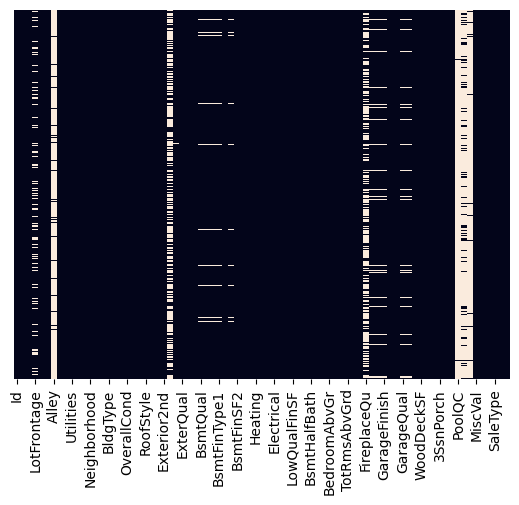

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)
#the white line indicates the missing values

In [8]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [9]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [10]:
df.drop(['Alley'], axis=1, inplace=True)

In [11]:
df['BsmtCond'] = df['BsmtCond'].fillna(df["BsmtCond"].mode()[0])

In [12]:
df['BsmtQual'] = df['BsmtQual'].fillna(df["BsmtQual"].mode()[0])

In [13]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df["FireplaceQu"].mode()[0])

In [14]:
df['GarageType'] = df['GarageType'].fillna(df["GarageType"].mode()[0])

In [15]:
    df.drop(['Id'], axis=1, inplace=True)

In [16]:
df['GarageFinish'] = df['GarageFinish'].fillna(df["GarageFinish"].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df["GarageQual"].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df["GarageCond"].mode()[0])

In [17]:
df.shape

(1460, 79)

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [19]:
def handle_missing_values(df):
    """
    Cleans the DataFrame by handling missing values:
    - Drops columns with >50% missing values
    - Fills remaining missing values:
        - Numerical columns: fill with mean
        - Categorical columns: fill with mode
    """
    # Calculate the threshold for 50% missing
    threshold = 0.5 * len(df)
    
    for col in df.columns:
        null_count = df[col].isnull().sum()
        
        if null_count > threshold:
            # Drop column if more than 50% missing
            df = df.drop(columns=[col])
            print(f"Column '{col}' dropped because it has {null_count} null values (>50%).")
        else:
            # Fill missing values
            if df[col].dtype in ['int64', 'float64']:
                mean_value = df[col].mean()
                df[col] = df[col].fillna(mean_value)
                print(f"Column '{col}' missing values filled with mean: {mean_value}")
            else:  # object / categorical
                mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
                df[col] = df[col].fillna(mode_value)
                print(f"Column '{col}' missing values filled with mode: {mode_value}")
    
    return df


In [20]:
df = handle_missing_values(df)


Column 'MSSubClass' missing values filled with mean: 56.897260273972606
Column 'MSZoning' missing values filled with mode: RL
Column 'LotFrontage' missing values filled with mean: 70.04995836802664
Column 'LotArea' missing values filled with mean: 10516.828082191782
Column 'Street' missing values filled with mode: Pave
Column 'LotShape' missing values filled with mode: Reg
Column 'LandContour' missing values filled with mode: Lvl
Column 'Utilities' missing values filled with mode: AllPub
Column 'LotConfig' missing values filled with mode: Inside
Column 'LandSlope' missing values filled with mode: Gtl
Column 'Neighborhood' missing values filled with mode: NAmes
Column 'Condition1' missing values filled with mode: Norm
Column 'Condition2' missing values filled with mode: Norm
Column 'BldgType' missing values filled with mode: 1Fam
Column 'HouseStyle' missing values filled with mode: 1Story
Column 'OverallQual' missing values filled with mean: 6.0993150684931505
Column 'OverallCond' missi

In [21]:
df.shape

(1460, 75)

In [22]:
#handling categorical features

In [23]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()

In [24]:
category_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [25]:
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder


In [27]:
maind_df = df.copy()

In [28]:
#convert all the category into onehot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [29]:
test_df = pd.read_csv('formulatedtest.csv')
final_df = pd.concat([df,test_df], axis = 0)

In [30]:

final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [31]:
final_df.shape

(2919, 76)

In [32]:
finali_df = category_onehot_multcols(category_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [33]:
final_df.shape

(2919, 38)

In [34]:
#removing dublicate columns

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [35]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [36]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MasVnrType
1422,120,37.000000,4435,6,5,2003,2003,170.0,686.0,0.0,...,0,0,0,0,0,0,3,2008,136500.0,NaN
1423,80,70.049958,19690,6,7,1966,1966,0.0,0.0,0.0,...,236,0,0,0,738,0,8,2006,274970.0,NaN
1424,20,70.049958,9503,5,5,1958,1983,0.0,457.0,374.0,...,28,0,0,0,0,0,6,2007,144000.0,NaN
1425,20,80.000000,10721,6,6,1959,1959,243.0,0.0,0.0,...,39,0,0,0,0,0,10,2008,142000.0,NaN
1426,60,81.000000,10944,7,5,1994,1994,448.0,1000.0,0.0,...,132,0,0,0,0,0,8,2008,271000.0,NaN


In [37]:
df_Test.drop(['SalePrice'], axis = 1, inplace = True)

C:\Users\kawsar\AppData\Local\Temp\ipykernel_13108\2320588844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'], axis = 1, inplace = True)


In [38]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [39]:
#Predicting and Selecting the Algorithm

In [40]:
import xgboost
classifier = xgboost.XGBRegressor()

In [41]:
regressor = xgboost.XGBRegressor()

In [42]:
#hyper_parameter optimization
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

In [43]:
from sklearn.model_selection import RandomizedSearchCV
#set up random search with 4-fold cv
#randomcv for efficiently optimizing a model's hyperparameters.
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [44]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1343, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~~~~~~~~~~~~~~~~~~~~^
        missing=self.missing,
        ^^^^^^^^^^^^^^^^^^^^^
    ...<14 lines>...
        feature_types=feature_types,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
        data=X,
    ...<9 lines>...
        ref=None,
    )
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1262, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 999, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
                                           ~~~~~~~~~~~~~~~~~~~~~^
        data=data,
        ^^^^^^^^^^
    ...<5 lines>...
        data_split_mode=data_split_mode,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1419, in dispatch_data_backend
    return _from_pandas_df(
        data=data,
    ...<5 lines>...
        data_split_mode=data_split_mode,
    )
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 700, in _from_pandas_df
    df, feature_names, feature_types = _transform_pandas_df(
                                       ~~~~~~~~~~~~~~~~~~~~^
        data, enable_categorical, feature_names, feature_types
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 662, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ~~~~~~~~~~~~~~~~~~~^
        data, meta, feature_names, feature_types, enable_categorical
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MasVnrType: object

--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1343, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~~~~~~~~~~~~~~~~~~~~^
        missing=self.missing,
        ^^^^^^^^^^^^^^^^^^^^^
    ...<14 lines>...
        feature_types=feature_types,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
        data=X,
    ...<9 lines>...
        ref=None,
    )
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
        **kwargs, ref=ref, nthread=self.n_jobs, max_bin=self.max_bin
    )
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1768, in __init__
    self._init(
    ~~~~~~~~~~^
        data,
        ^^^^^
    ...<12 lines>...
        max_quantile_blocks=max_quantile_batches,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1832, in _init
    it.reraise()
    ~~~~~~~~~~^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 598, in _handle_exception
    return fn()
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ~~~~~~~~~^^^^^^^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1632, in next
    input_data(**self.kwargs)
    ~~~~~~~~~~^^^^^^^^^^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 774, in inner_f
    return func(**kwargs)
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 665, in input_data
    new, feature_names, feature_types = _proxy_transform(
                                        ~~~~~~~~~~~~~~~~^
        data,
        ^^^^^
    ...<2 lines>...
        self._enable_categorical,
        ^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1685, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ~~~~~~~~~~~~~~~~~~~~^
        data, enable_categorical, feature_names, feature_types
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 662, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ~~~~~~~~~~~~~~~~~~~^
        data, meta, feature_names, feature_types, enable_categorical
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\kawsar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MasVnrType: object


In [ ]:

random_cv.best_estimator_